In [1]:
import sys
import numpy
import matplotlib
import pandas
import sklearn

print('python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))



python: 3.8.5 (tags/v3.8.5:580fbb0, Jul 20 2020, 15:57:54) [MSC v.1924 64 bit (AMD64)]
Numpy: 1.19.1
matplotlib: 3.3.0
pandas: 1.1.0
sklearn: 0.23.1


In [59]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd



In [60]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','single_epithelial_size',
       'bare_nuclei','bland_chromatin','normal_nucleoli','mitosis','class' ]
df=pd.read_csv(url,names=names)

In [61]:
#Preprocess the data
df.replace('?',-99999,inplace=True)
print(df.axes)

df.drop(['id'],1,inplace=True)

#print the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitosis', 'class'],
      dtype='object')]
(699, 10)


In [69]:
#Do dataset visualizations
print(df.loc[6])
print(df.describe())

clump_thickness            1
uniform_cell_size          1
uniform_cell_shape         1
marginal_adhesion          1
single_epithelial_size     2
bare_nuclei               10
bland_chromatin            3
normal_nucleoli            1
mitosis                    1
class                      2
Name: 6, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000        

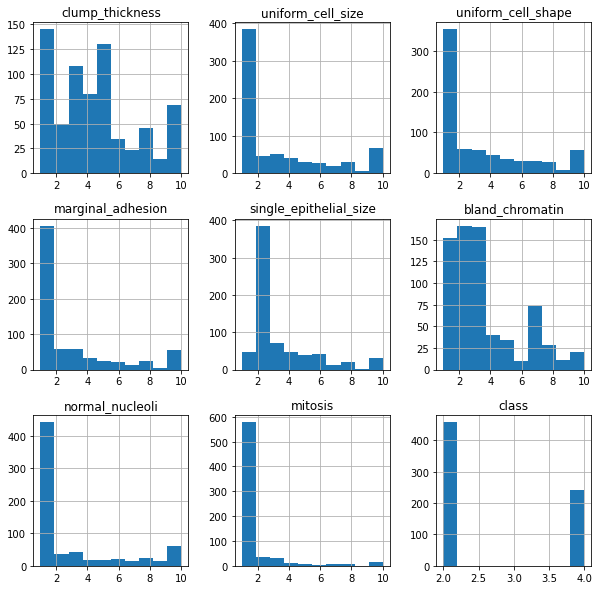

In [24]:
#Plot histogram for each variable
df.hist(figsize=(10,10))
plt.show()

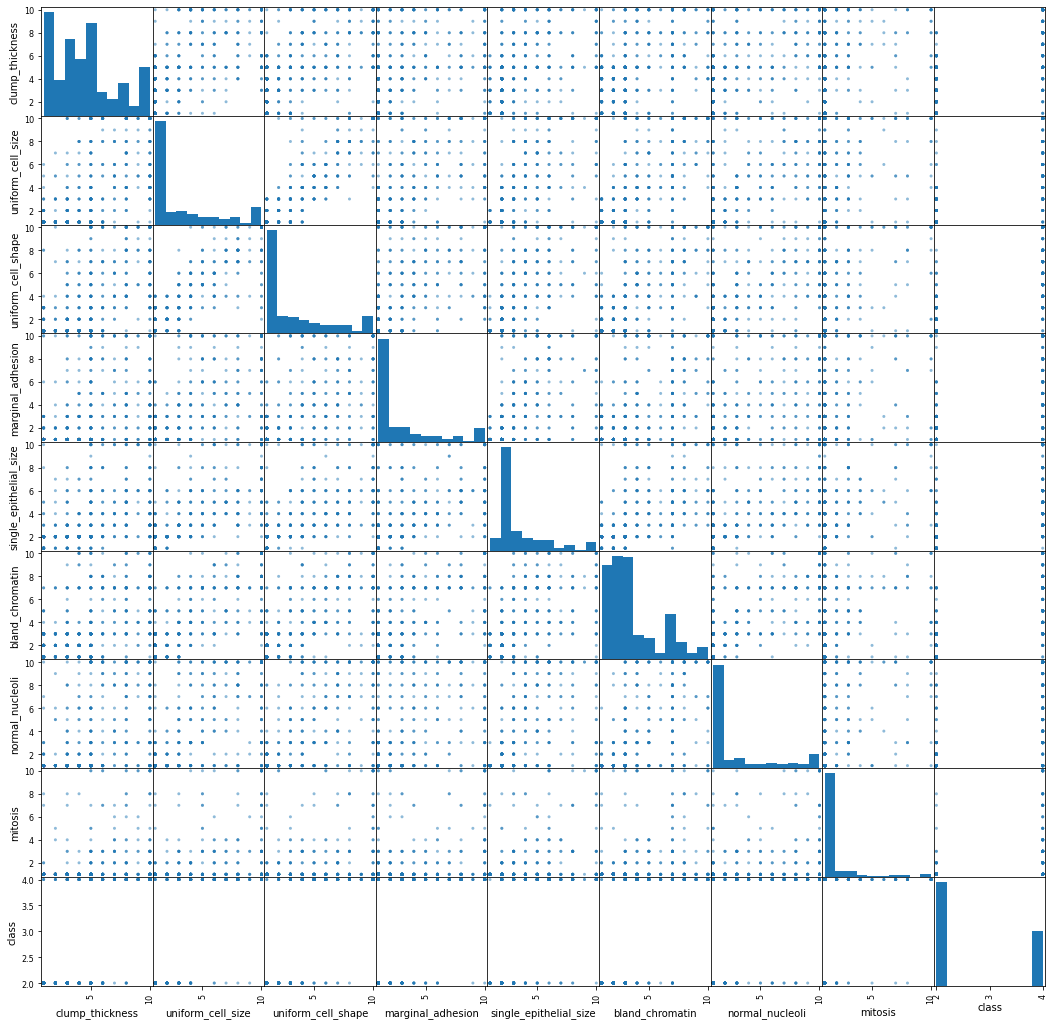

In [26]:
#Create scatter plot matrix
scatter_matrix(df,figsize=(18,18))
plt.show()

In [63]:
#Create X and Y datasets for training
X= np.array(df.drop(['class'],1))
y= np.array(df['class'])

X_train,X_test,y_train,y_test=model_selection.train_test_split(X ,y, test_size=0.2)

In [64]:
#Specifying testing options
seed=8
scoring='accuracy'

In [67]:
#Define the models to train
models=[]
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))

#Evaluating each model in turn
results=[]
names=[]

for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state= seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:  %f  (%f)" % (name, cv_results.mean(),cv_results.std())
    print(msg)


KNN:  0.967662  (0.034129)
SVM:  0.656688  (0.056754)


c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [68]:
#Make prdictions on validation set
for name, model in models:
    model.fit(X_train, y_train)
    predictions= model.predict(X_test)
    
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9857142857142858
              precision    recall  f1-score   support

           2       0.99      0.99      0.99        91
           4       0.98      0.98      0.98        49

    accuracy                           0.99       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140

SVM
0.65
              precision    recall  f1-score   support

           2       0.65      1.00      0.79        91
           4       0.00      0.00      0.00        49

    accuracy                           0.65       140
   macro avg       0.33      0.50      0.39       140
weighted avg       0.42      0.65      0.51       140



c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
clf= SVC

clf.fit(X_train,y_train)
accuracy= clf.score(X_test, y_test)
print(accuracy)

example=np.array([[4,2,1,1,1,2,3,2,4]])
example=example.reshape(len(example),-1)
prediction= clf.predict(example)
print(prediction)

NameError: name 'SVC' is not defined